# IMDB Movie Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

sns.set(color_codes=True)
sns.set(style="ticks")

data_frame_base = pd.read_csv("movie_metadata.csv")
data_frame_base = data_frame_base.drop('plot_keywords',1) ## PLOT_KEYWORDS COLUMN IS EXCLUDED

#data_frame.head()

temp_col1 = data_frame_base['imdb_score']
temp_col2 = data_frame_base['gross']

temp1 = np.argwhere(np.isnan(temp_col1))
temp2 = np.argwhere(np.isnan(temp_col2))
    
print(list(data_frame_base))
print(temp1)
print(temp_col2)

In [2]:
data_frame = data_frame_base

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

for column_name in data_frame.columns:
    le = LabelEncoder()
    column = data_frame[column_name]
    normalized_column = column.fillna(0) if column.dtype.kind in 'biufc' else column.fillna('UNKNOWN')
    class_values = normalized_column if column.dtype.kind in 'biufc' else pd.Series(list(le.fit_transform(normalized_column))) 
    data_frame[column_name].update(class_values)
        

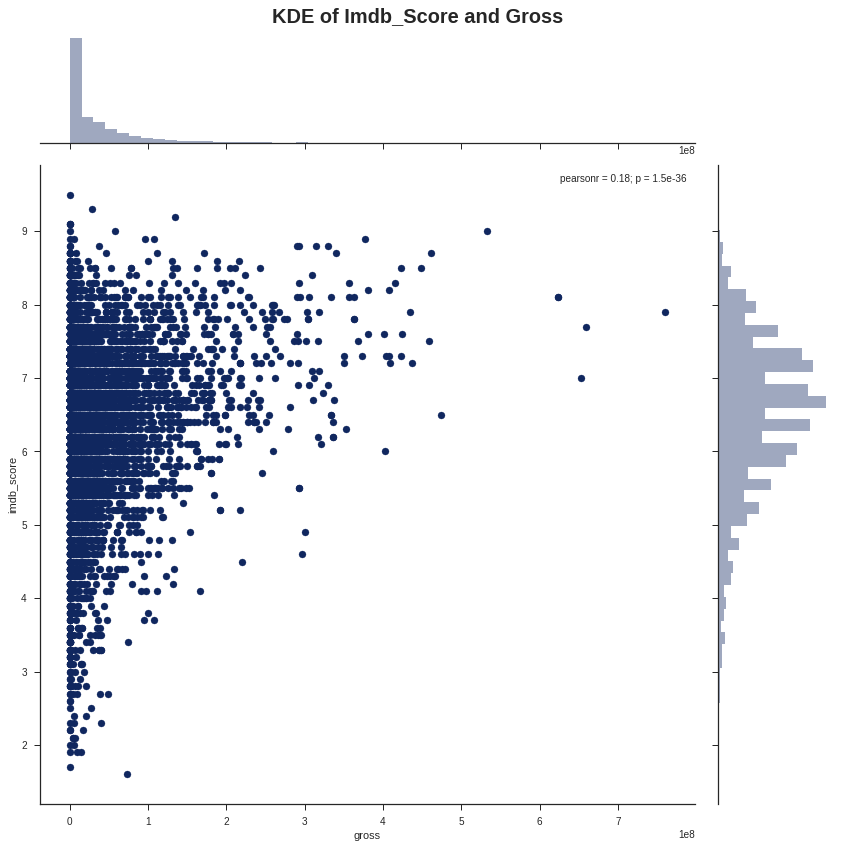

In [5]:
g = sns.jointplot('gross', 'imdb_score', size=12, data=data_frame, kind="scatter", color="#10275F")
plt.subplots_adjust(top=0.95)
g.fig.suptitle('KDE of Imdb_Score and Gross', size=20, weight='bold')